# Visualize MERIS TSM


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# Load stacked NetCDF
stack_path = "../../MERIS_downloads/stacked_tsm.nc"  # or "stacked_tsm_clipped.nc"
ds = xr.open_dataset(stack_path)
tsm = ds["TSM"]

# Summary of dimensions and time range
print("Dataset summary:")
print(tsm)


Dataset summary:
<xarray.DataArray 'TSM' (time: 5, lat: 7408, lon: 7408)>
[274392320 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2010-04-01T18:52:04 ... 2010-04-03T17:58:13
  * lat      (lat) float64 30.0 30.0 30.01 30.01 30.01 ... 49.99 49.99 50.0 50.0
  * lon      (lon) float64 -130.0 -130.0 -130.0 -130.0 ... -110.0 -110.0 -110.0


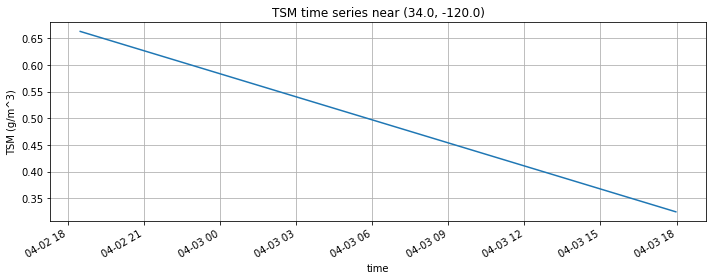

In [3]:
# Plot 1: Timeseries at a coastal point
lat_pt, lon_pt = 34.0, -120.0
pt_series = tsm.sel(lat=lat_pt, lon=lon_pt, method="nearest")

plt.figure(figsize=(10, 4))
pt_series.plot.line()
plt.title(f"TSM time series near ({lat_pt}, {lon_pt})")
plt.ylabel("TSM (g/m^3)")
plt.grid()
plt.tight_layout()
plt.show()

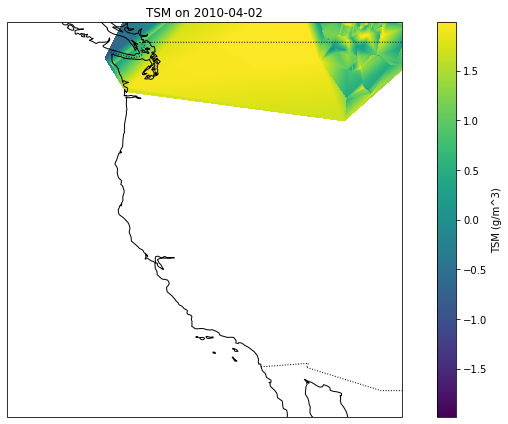

In [9]:
# Plot 2: Map of first time step
first = tsm.isel(time=2)
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
first.plot(ax=ax, cmap="viridis", cbar_kwargs={"label": "TSM (g/m^3)"})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.set_title(f"TSM on {str(first.time.values)[:10]}")
plt.tight_layout()
plt.show()

In [7]:
# Plot 3: Optional animation preview
# Uncomment below to preview animation of time steps (slower for large datasets)
import matplotlib.animation as animation
fig, ax = plt.subplots(figsize=(8, 5))
img = tsm.isel(time=0).plot(ax=ax, animated=True, cmap="viridis")

def animate(i):
    img.set_array(tsm.isel(time=i).values.flatten())
    ax.set_title(str(tsm.time[i].values)[:10])
    ani = animation.FuncAnimation(fig, animate, frames=len(tsm.time), interval=500)
    plt.show()
        

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)